## KUTUNSEPRIMARY BEAM MODEL:: 5 - 6.7 GHz

In [100]:
# Load python modules
import sys; sys.path.append('../')
from utilities import *
import os
%load_ext autoreload
%autoreload 2
%matplotlib inline
# from zernike1 import *
from astropy.io import fits
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1.0 Upload OSKAR beams from fits

In [2]:
def testoskarbeam(path = '/home/narh/tanvenvironment/testoskarprimary/oskar_beamsim/m1E6'):
    
    XX_re = fits.open('%s' %os.path.join(path, 'meerkat_beam__jones_S0000_XX_re.fits'))[0].data
    XX_im = fits.open('%s' %os.path.join(path, 'meerkat_beam__jones_S0000_XX_im.fits'))[0].data
    XY_re = fits.open('%s' %os.path.join(path, 'meerkat_beam__jones_S0000_XY_re.fits'))[0].data
    XY_im = fits.open('%s' %os.path.join(path, 'meerkat_beam__jones_S0000_XY_im.fits'))[0].data
    YX_re = fits.open('%s' %os.path.join(path, 'meerkat_beam__jones_S0000_YX_re.fits'))[0].data
    YX_im = fits.open('%s' %os.path.join(path, 'meerkat_beam__jones_S0000_YX_im.fits'))[0].data
    YY_re = fits.open('%s' %os.path.join(path, 'meerkat_beam__jones_S0000_YY_re.fits'))[0].data
    YY_im = fits.open('%s' %os.path.join(path, 'meerkat_beam__jones_S0000_YY_im.fits'))[0].data
    
    emap = []
    emap.append([XX_re + 1j*XX_im, XY_re + 1j*XY_im])  
    emap.append([YX_re + 1j*YX_im, YY_re + 1j*YY_im])
    
    s = np.array(emap)  

    s = np.swapaxes(s, axis1=2, axis2=0)
    
    
    return  s 


# def testoskarbeam(path = '/home/narh/tanvenvironment/testoskarprimary/oskar_beamsim/m1E6'):
#     XXamp = os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_XX.txt')
#     XYamp = os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_XY.txt')
#     YXamp = os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_YX.txt')
#     YYamp = os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_YY.txt')
#     XXphse = os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_PHASE_XX.txt')
#     XYphse = os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_PHASE_XY.txt')
#     YXphse = os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_PHASE_YX.txt')
#     YYphse = os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_PHASE_YY.txt')

#     amp = np.loadtxt('%s' %XXamp)
#     phs = np.loadtxt('%s' %XXphse)
#     cmplx = ampphase2complex(amplitude=amp, phase=phs)
#     xx_im = (cmplx.imag).reshape(128,128)
#     xx_re = (cmplx.real).reshape(128,128)
    
#     amp = np.loadtxt('%s' %XYamp)
#     phs = np.loadtxt('%s' %XYphse)
#     cmplx = ampphase2complex(amplitude=amp, phase=phs)
#     xy_im = (cmplx.imag).reshape(128,128)
#     xy_re = (cmplx.real).reshape(128,128)
    
#     amp = np.loadtxt('%s' %YXamp)
#     phs = np.loadtxt('%s' %YXphse)
#     cmplx = ampphase2complex(amplitude=amp, phase=phs)
#     yx_im = (cmplx.imag).reshape(128,128)
#     yx_re = (cmplx.real).reshape(128,128)
    
#     amp = np.loadtxt('%s' %YYamp)
#     phs = np.loadtxt('%s' %YYphse)
#     cmplx = ampphase2complex(amplitude=amp, phase=phs)
#     yy_im = (cmplx.imag).reshape(128,128)
#     yy_re = (cmplx.real).reshape(128,128)
    
#     emap = []
#     emap.append([xx_im, xy_im])  #, (emxy_re, emxy_im) ])
#     emap.append([yx_im, yy_im])
#     # emap.append([(emyx_re, emyx_im), (emyy_re, emyy_im) ])
#     s = np.array(emap)  #.shape

#     #embeam_im = np.swapaxes(s, axis1=2, axis2=0)
    
    
#     return  s  #embeam_im #xx_im, xy_im, yx_im, yy_im

### 1.1 Histogram Plot

In [102]:
def plothist(xx, xy, yx, yy, set_title = 'ANT1', channum=0):
    d1 =  xx
    d2 =  xy
    d3 =  yx
    d4 = yy
#     res = d1[np.nonzero(d1)]
#     pp1 = res #zeromask(channel = np.nan_to_num(d)) 
#     print pp1.std()
    fig = plt.figure(1, figsize=(15,15))
    ax = fig.add_subplot(2,2, 1)
    n, bins, patches = ax.hist(d1.ravel(), 100, normed=True, facecolor='green', 
                                alpha=0.75, label=r'$\sigma = %4f$' %d1.std()) #%rmse(d1)
    ax.set_xlabel('Error in the Imaginary part', fontsize=15)
    ax.set_ylabel('Data Count', fontsize=15)
    ax.set_title(r'$D_{XX}$', fontsize=15) # % (set_title, channum))
    plt.legend(fontsize=12, framealpha=0.5)
    
    ax = fig.add_subplot(2,2, 2)
#     res = d2[np.nonzero(d2)]
#     pp1 = res
    n, bins, patches = ax.hist(d2.ravel(), 100, normed=True, facecolor='green', 
                                alpha=0.75, label=r'$\sigma = %4f$' % d2.std())
    ax.set_xlabel('Error in the Imaginary part', fontsize=15)
    ax.set_ylabel('Data Count', fontsize=15)
#     ax.set_title('%s CHAN_%d' % (set_title, channum))
    ax.set_title(r'$D_{XY}$', fontsize=15)
    plt.legend(fontsize=12, framealpha=0.5)
    
    ax = fig.add_subplot(2,2, 3)
#     res = d3[np.nonzero(d3)]
#     pp1 = res
    n, bins, patches = ax.hist(d3.ravel(), 100, normed=True, facecolor='green', 
                                alpha=0.75, label=r'$\sigma = %4f$' % d3.std())
    ax.set_xlabel('Error in the Imaginary part', fontsize=15)
    ax.set_ylabel('Data Count', fontsize=15)
#     ax.set_title('%s CHAN_%d' % (set_title, channum))
    ax.set_title(r'$D_{YX}$', fontsize=15)
    plt.legend(fontsize=12, framealpha=0.5)
    
    ax = fig.add_subplot(2,2, 4)
#     res = d3[np.nonzero(d3)]
#     pp1 = res
    n, bins, patches = ax.hist(d4.ravel(), 100, normed=True, facecolor='green', 
                                alpha=0.75, label=r'$\sigma = %4f$' % d4.std())
    ax.set_xlabel('Error in the Imaginary part', fontsize=15)
    ax.set_ylabel('Data Count', fontsize=15)
#     ax.set_title('%s CHAN_%d' % (set_title, channum))
    ax.set_title(r'$D_{YY}$', fontsize=15)
    plt.legend(fontsize=12, framealpha=0.5)
    
    fig.subplots_adjust(wspace=0.2,hspace=0.2) # right=0.78, bottom=0.2)
    
    fig.savefig('hist_%s_chan%d.png' %(set_title, channum), dpi=100)

### 1.2 Generate Cross-sections of beams

In [103]:
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

def plot_1Dslice(jns_beam, beamsize=6.):
    """
    Generates 1D profile of Jones beams in (2,2,N,N) format
    ** jns_beam:: Jones beams
    ** beamsize:: image size in degrees
    return::
      * Left & right diagonal plots
      * Horizontal & vertical plots
    """
    shp = jns_beam.shape[-1]
    fig = plt.figure(1, figsize=(25,10))
    n = 1
    x = np.linspace(-beamsize/2.,beamsize/2.,shp)
    ax = fig.add_subplot(1,2, n)
    ax.plot(x,jns_beam[0,0,...].diagonal(), linestyle='-', marker='o', label='XX Ldiag')
    ax.plot(x,np.rot90(jns_beam[0,0,...]).diagonal(), linestyle='-', marker='o', label='XX Rdiag')
    ax.plot(x,jns_beam[0,0,...][jns_beam[0,0,...].shape[-1]/2,:], label='XX H')
    ax.plot(x,jns_beam[0,0,...][:,jns_beam[0,0,...].shape[-1]/2], label='XX V')
    #ax.plot(x,yy_re[1].diagonal(), label='VV')
    ax.plot(x,jns_beam[1,1,...].diagonal(), linestyle='-', marker='o', label='YY Ldiag')
    ax.plot(x,np.rot90(jns_beam[1,1,...]).diagonal(), linestyle='-', marker='o', label='YY Rdiag')
    ax.plot(x,jns_beam[1,1,...][jns_beam[1,1,...].shape[-1]/2,:], label='YY H')
    ax.plot(x,jns_beam[1,1,...][:,jns_beam[1,1,...].shape[-1]/2], label='YY V')
    ax.set_xlabel(r'$\theta$ [deg]', fontsize=20)
    ax.set_ylabel(r'Normalised Radiation Pattern', fontsize=20)
    ax.set_title(r' Co-polar',fontsize=20)
    ax.legend(loc=0)
    
    n+=1

    ax = fig.add_subplot(1,2, n)
    ax.plot(x,jns_beam[0,1,...].diagonal(),linestyle='-', marker='o', label='XY Ldiag')
    ax.plot(x,np.rot90(jns_beam[0,1,...]).diagonal(), linestyle='-', marker='o', label='XY Rdiag')
    ax.plot(x,jns_beam[0,1,...][jns_beam[0,1,...].shape[-1]/2,:], label='XY H')
    ax.plot(x,jns_beam[0,1,...][:,jns_beam[0,1,...].shape[-1]/2], label='XY V')
#     ax.plot(x,yy_re[1].diagonal(), label='VV')
    ax.plot(x,jns_beam[1,0,...].diagonal(), linestyle='-', marker='o', label='YX Ldiag')
    ax.plot(x,np.rot90(jns_beam[1,0,...]).diagonal(), linestyle='-', marker='o', label='YX Rdiag')
    ax.plot(x,jns_beam[1,0,...][jns_beam[1,0,...].shape[-1]/2,:], label='YX H')
    ax.plot(x,jns_beam[1,0,...][:,jns_beam[1,0,...].shape[-1]/2], label='YX V')
    ax.set_xlabel(r'$\theta$ [deg]', fontsize=20)
    ax.set_ylabel(r'Normalised Radiation Pattern', fontsize=20)
    ax.set_title(r' Cross-polar',fontsize=20)
    ax.legend(loc=0)
    
    return None 

In [ ]:
def ampphase2complex(amplitude, phase):
    return amplitude * np.exp(1j*phase)

In [6]:
# path ='/net/elwood/home/narh/OSKAR-SIM/OSKAR_Simulation/gssti/meerkat_sim_results/meerkat_beam__jones_S0000_XX_im.fits'


# os.path.join(path, 'beam_pattern_S0000_TIME_SEP_CHAN_SEP_AMP_YY.txt')

In [104]:
m = testoskarbeam(path = '/net/elwood/home/narh/OSKAR-SIM/OSKAR_Simulation/gssti/2D128/meerkat_sim_results/')
print  m.shape
# plot2d_multi(m, diameter=10, vrange=None, title='', svfigname='phse8e4.png')

(50, 2, 2, 128, 128)


In [105]:
%load_ext autoreload
%autoreload 2
from functionutils2 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# plot2d_multi(m[0].real, diameter=4, vrange=None, title='')

In [107]:
# m = testoskarbeam(path = '/net/elwood/home/narh/OSKAR-SIM/OSKAR_Simulation/gssti/2D128/meerkat_sim_results/')
# print  m.shape

### 1.3 Plot Complex Beam pattern

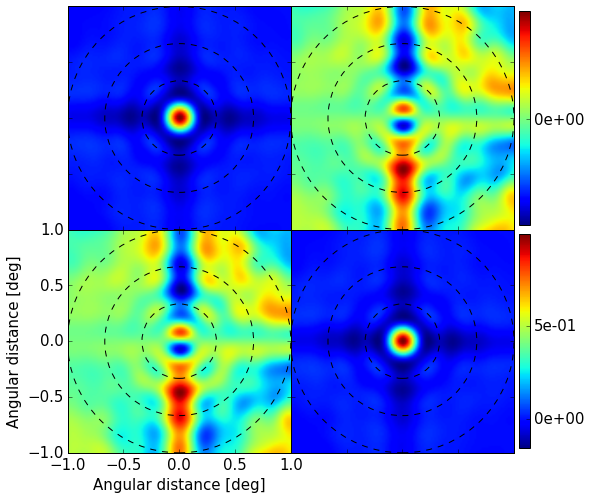

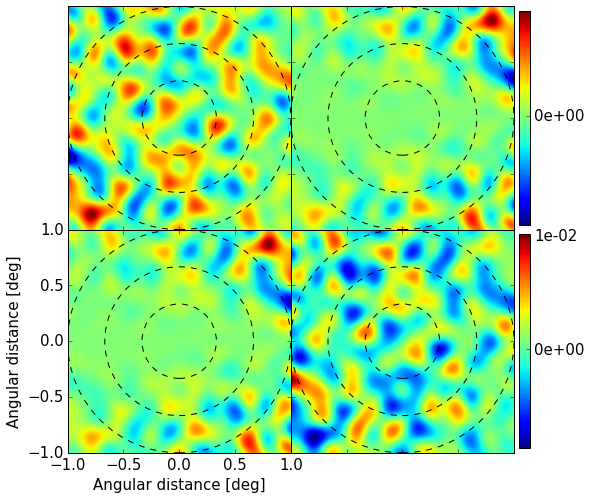

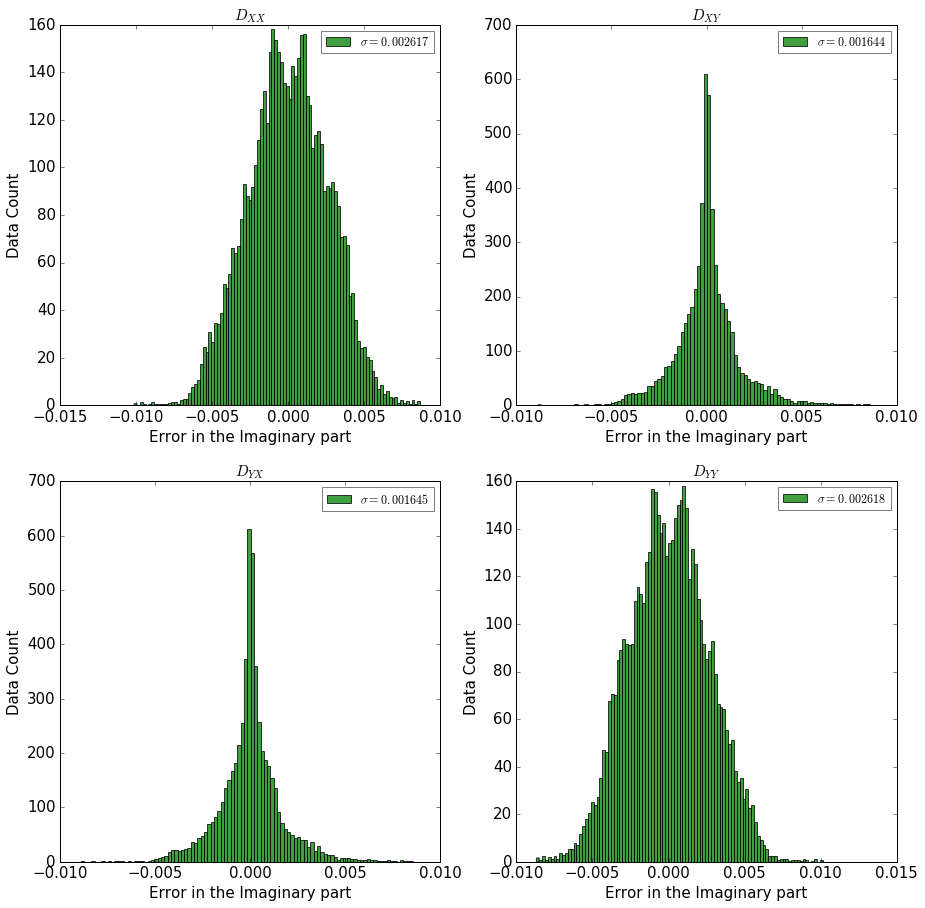

In [106]:
idx = 0
plot2d_multi(m[idx].real, diameter=2, vrange=None, title='')
# ** Choosing channel 1 of the above 2D grid, we get::
    
# beams = np.zeros((2,2,256,256))
# beams[0,0,...] = outer_mask(data[1,0,0,...].real)
# beams[0,1,...] = outer_mask(data[1,0,1,...].real)
# beams[1,0,...] = outer_mask(data[1,1,0,...].real)
# beams[1,1,...] = outer_mask(data[1,1,1,...].real)

# plot_1Dslice(jns_beam=m[idx].real, beamsize=2.)

plot2d_multi(m[idx].imag, diameter=2, vrange=None, title='')

plothist(m[idx,0,0,:,:].imag, m[idx,0,1,:,:].imag, m[idx,1,0,:,:].imag, m[idx,1,1,:,:].imag, set_title = 'ANT1', channum=idx)

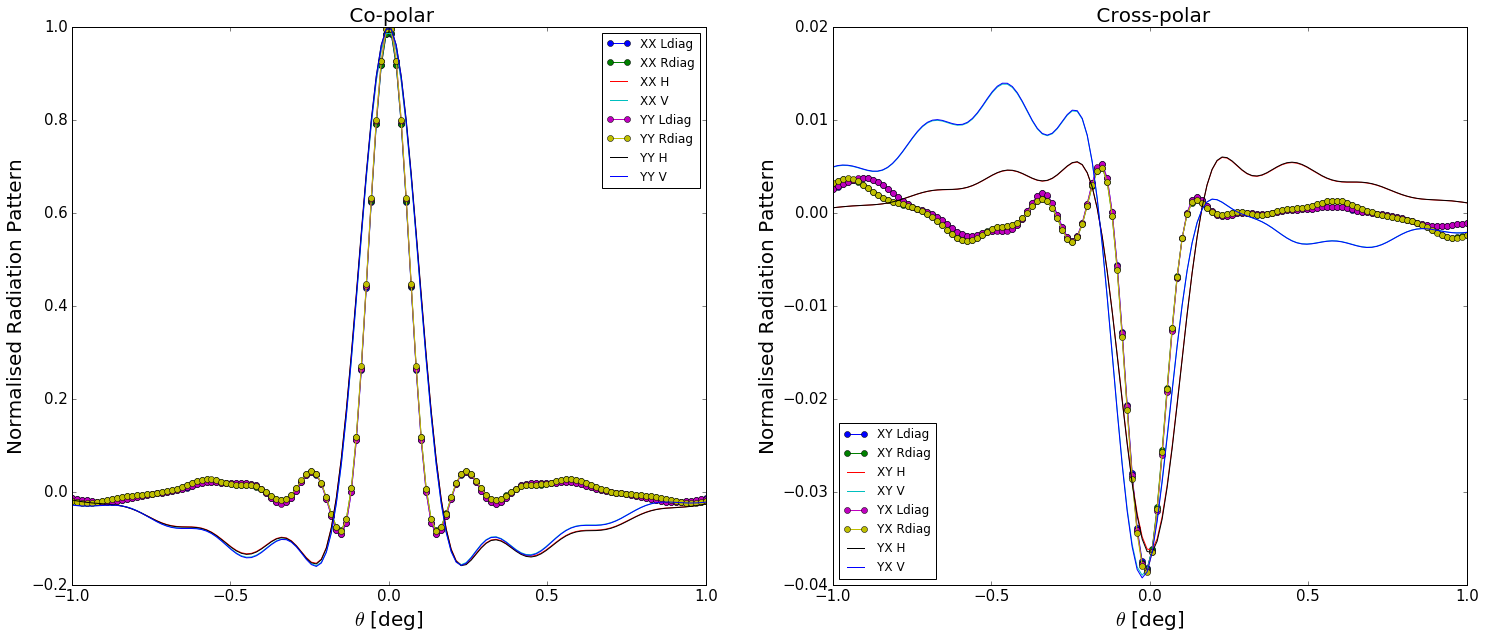

In [20]:
plot_1Dslice(jns_beam=m[idx].real, beamsize=2.)

In [108]:
# +++++++  test Mueller
# print m.shape
# print m[0].shape
# m1 = m[0].reshape(1, m[0].shape[0], m[0].shape[1], m[0].shape[2], m[0].shape[3])
# print m1.shape
# print m1.dtype
# m1 = m1.astype('c16')
# print m1.dtype

# # m1
# Mj = jones_to_mueller(f1=m1)
# print Mj.shape
# Mj = Mj[0].real

# for jj in  xrange(4):
    
#      Mj[jj, jj,:,:] = np.nan_to_num(np.sqrt(Mj[jj, jj,:,:]))
    
# # N = Mj[0][::1,::1,:,:]


# # Mi = Mj[0].reshape(16,Mj.shape[3],Mj.shape[-1])

# # mu[::5,:,:] = np.sqrt(m[::5,:,:])
# # Wxy = mu.reshape(4,4, 128,128)

# plot2d_multi(Mj, diameter=2, vrange=None, svfigname='osk_xymueller.png', figsize=(10,10))

In [109]:
# Mj[0][::].shape

### 1.4 Mueller Matrix

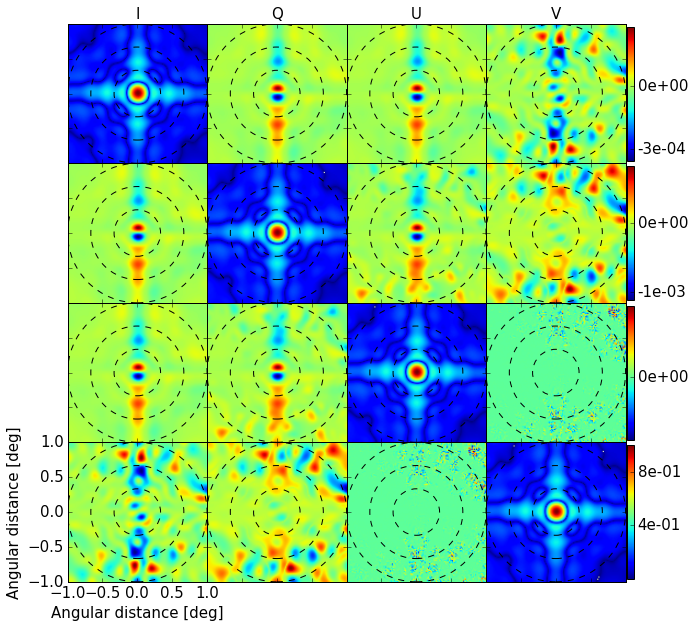

In [110]:
pt = '/net/elwood/home/narh/OSKAR-SIM/OSKAR_Simulation/gssti/2D128/meerkat_sim_results/'
oskt = os.path.join(pt, 'meerkat_beam__S0000_mueller_beam.fits')
mu = fits.open('%s' %oskt)[0].data[0]
mu[::5,:,:] = np.sqrt(mu[::5,:,:])
Wxy = mu.reshape(4,4, 128,128)
# W.shape
plot2d_multi(Wxy, diameter=2, vrange=None, svfigname='osk_xymueller.png', figsize=(10,10))

### 1.5 Intrinsic Cross Polarisation

/home/narh/tanvenvironment/tan_new_app/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


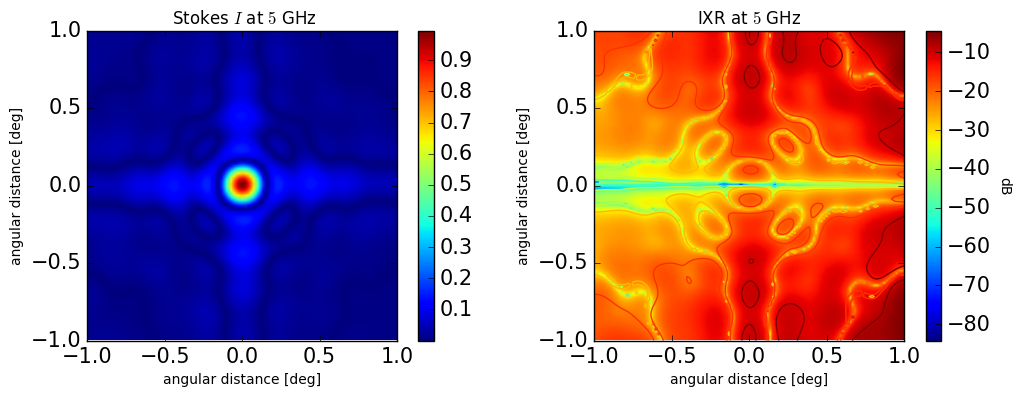

In [98]:
import  mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

cc = 0
pt = '/net/elwood/home/narh/OSKAR-SIM/OSKAR_Simulation/gssti/2D128/meerkat_sim_results/'
oskt = os.path.join(pt, 'meerkat_beam__S0000_mueller_beam.fits')
mu = fits.open('%s' %oskt)[0].data[cc]
mu[::5,:,:] = np.sqrt(mu[::5,:,:])
Wxy = mu.reshape(4,4, 128,128)


a = Wxy.copy()
M = 20*np.log10(np.sqrt(a[0,1]**2 + a[0,2]**2 + a[0,3]**2)/a[0,0]**2)
d = a[0,0]
diameter = 2

cnum = 5

# fig = plt.figure(num=1, figsize=(12, 4), dpi= 100)
# g = axes_grid.ImageGrid(fig, 111, nrows_ncols=nrc, axes_pad=0.00, add_all=True,\
#                             share_all=False, aspect=True, label_mode='1', cbar_mode='none')

fig = plt.figure(num=1, figsize=(12, 4), dpi= 100)
ax = fig.add_subplot(121)
plt.imshow(a[0,0]**2,  extent = [-diameter/2, diameter/2, -diameter/2, diameter/2])
cbar = plt.colorbar()
plt.title(r' Stokes $I$ at $%s$ GHz' %cnum)
plt.ylabel(r'angular distance [deg]')
plt.xlabel(r'angular distance [deg]')
cbar.set_label(r'',  labelpad=15, rotation=270, fontsize=12)
ax = fig.add_subplot(122)
ixr = plt.contour(M, extent = [-diameter/2, diameter/2, -diameter/2, diameter/2])
# ixr = plt.contourf(M)
ixr = plt.imshow(M, extent = [-diameter/2, diameter/2, -diameter/2, diameter/2])
# plt.axis('off')
cbar = plt.colorbar()
plt.title(r'IXR at $%s$ GHz' %cnum)
plt.ylabel(r'angular distance [deg]')
plt.xlabel(r'angular distance [deg]')
# cbar.set_label(r'dB',  labelpad=-40, y=1.05, rotation=270, fontsize=20)
cbar.set_label(r'dB',  labelpad=15, rotation=270, fontsize=10)
# plt.colorbar()

/home/narh/tanvenvironment/tan_new_app/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


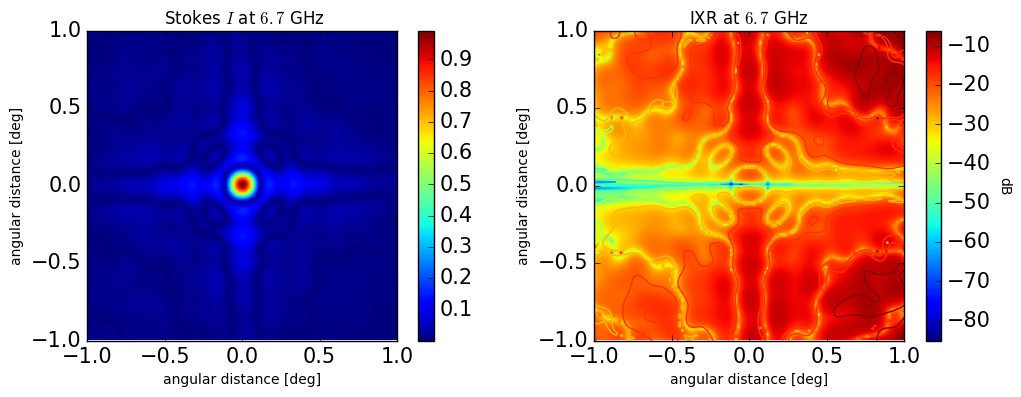

In [99]:
import  mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

cc = -1
pt = '/net/elwood/home/narh/OSKAR-SIM/OSKAR_Simulation/gssti/2D128/meerkat_sim_results/'
oskt = os.path.join(pt, 'meerkat_beam__S0000_mueller_beam.fits')
mu = fits.open('%s' %oskt)[0].data[cc]
mu[::5,:,:] = np.sqrt(mu[::5,:,:])
Wxy = mu.reshape(4,4, 128,128)


a = Wxy.copy()
M = 20*np.log10(np.sqrt(a[0,1]**2 + a[0,2]**2 + a[0,3]**2)/a[0,0]**2)
d = a[0,0]
diameter = 2

cnum = 6.7

# fig = plt.figure(num=1, figsize=(12, 4), dpi= 100)
# g = axes_grid.ImageGrid(fig, 111, nrows_ncols=nrc, axes_pad=0.00, add_all=True,\
#                             share_all=False, aspect=True, label_mode='1', cbar_mode='none')

fig = plt.figure(num=1, figsize=(12, 4), dpi= 100)
ax = fig.add_subplot(121)
plt.imshow(a[0,0]**2,  extent = [-diameter/2, diameter/2, -diameter/2, diameter/2])
cbar = plt.colorbar()
plt.title(r' Stokes $I$ at $%s$ GHz' %cnum)
plt.ylabel(r'angular distance [deg]')
plt.xlabel(r'angular distance [deg]')
cbar.set_label(r'',  labelpad=15, rotation=270, fontsize=12)
ax = fig.add_subplot(122)
ixr = plt.contour(M, extent = [-diameter/2, diameter/2, -diameter/2, diameter/2])
# ixr = plt.contourf(M)
ixr = plt.imshow(M, extent = [-diameter/2, diameter/2, -diameter/2, diameter/2])
# plt.axis('off')
cbar = plt.colorbar()
plt.title(r'IXR at $%s$ GHz' %cnum)
plt.ylabel(r'angular distance [deg]')
plt.xlabel(r'angular distance [deg]')
# cbar.set_label(r'dB',  labelpad=-40, y=1.05, rotation=270, fontsize=20)
cbar.set_label(r'dB',  labelpad=15, rotation=270, fontsize=10)
# plt.colorbar()

In [48]:
# idx = 1
# plot2d_multi(m[idx].real, diameter=2, vrange=None, title='')
# plot2d_multi(m[idx].imag, diameter=2, vrange=None, title='')

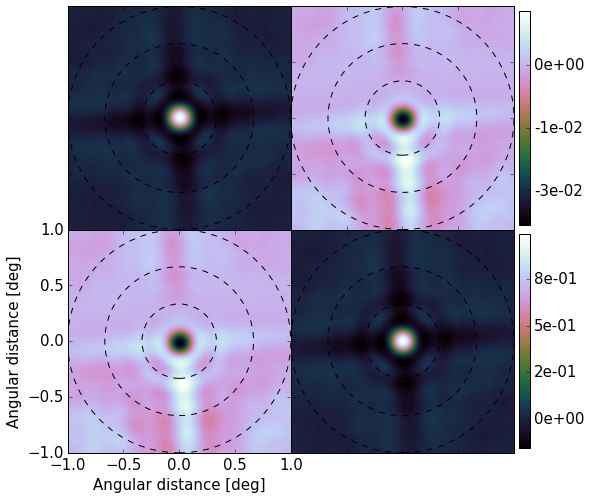

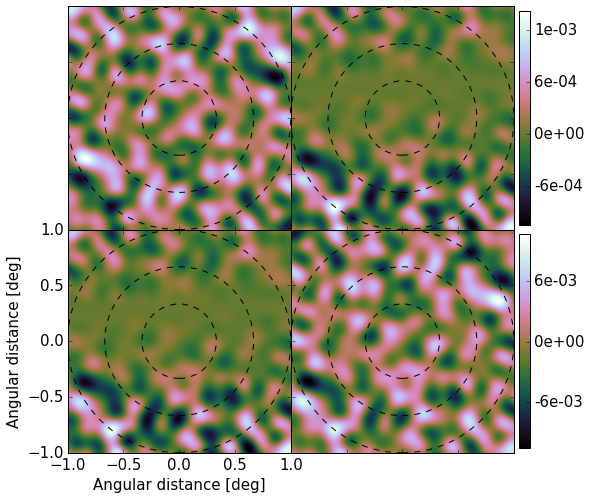

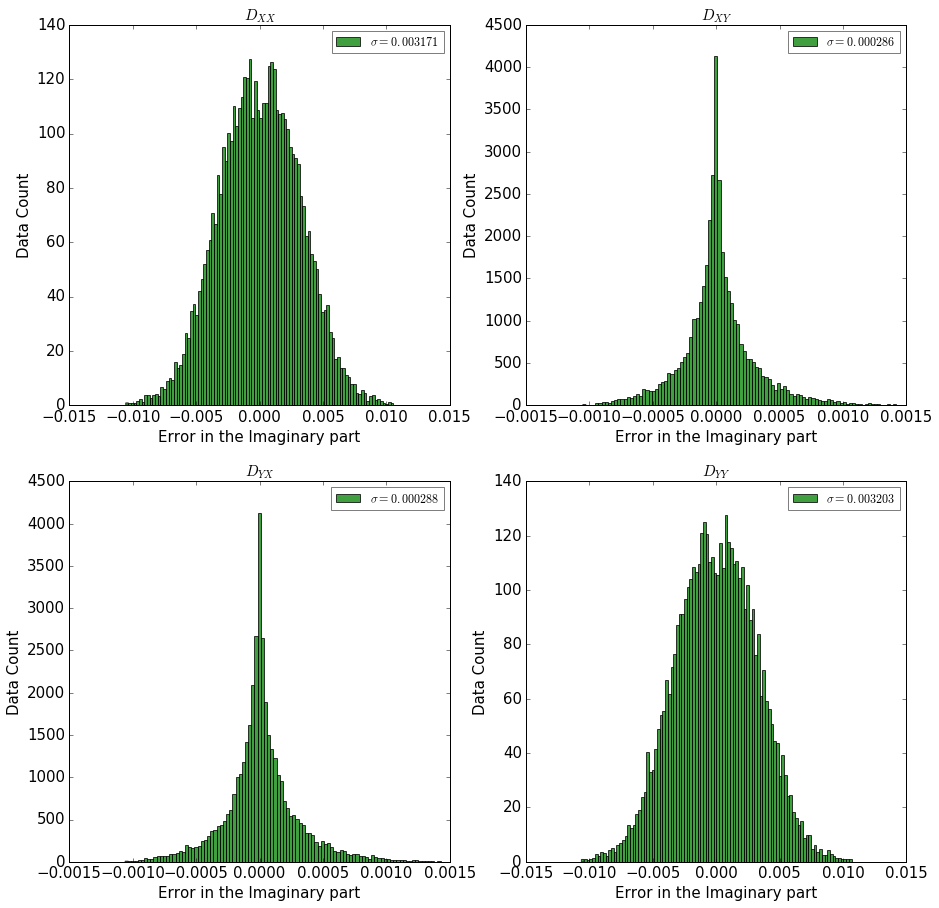

In [21]:
idx = 25
plot2d_multi(m[idx].real, diameter=2, vrange=None, title='')
plot2d_multi(m[idx].imag, diameter=2, vrange=None, title='')

plothist(m[idx,0,0,:,:].imag, m[idx,0,1,:,:].imag, m[idx,1,0,:,:].imag, m[idx,1,1,:,:].imag, set_title = 'ANT1', channum=idx)

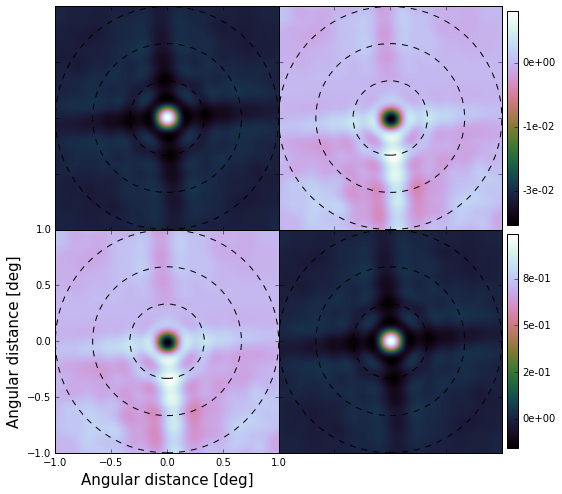

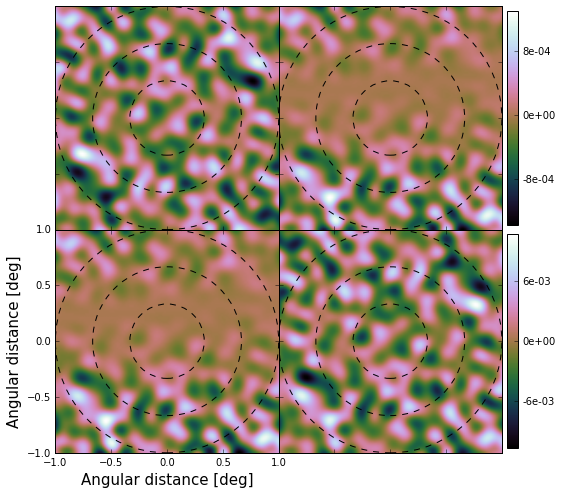

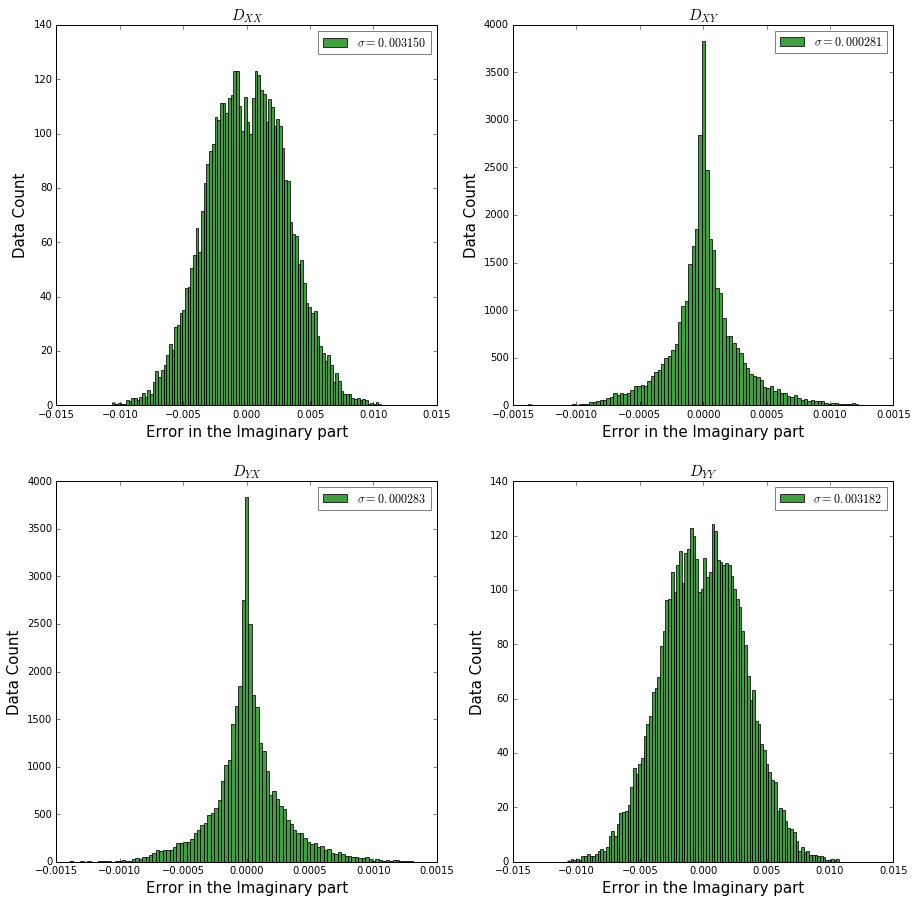

In [52]:
idx = 45
plot2d_multi(m[idx].real, diameter=2, vrange=None, title='')
plot2d_multi(m[idx].imag, diameter=2, vrange=None, title='')

plothist(m[idx,0,0,:,:].imag, m[idx,0,1,:,:].imag, m[idx,1,0,:,:].imag, m[idx,1,1,:,:].imag, set_title = 'ANT1', channum=idx)

In [37]:
m.shape

(50, 2, 2, 128, 128)

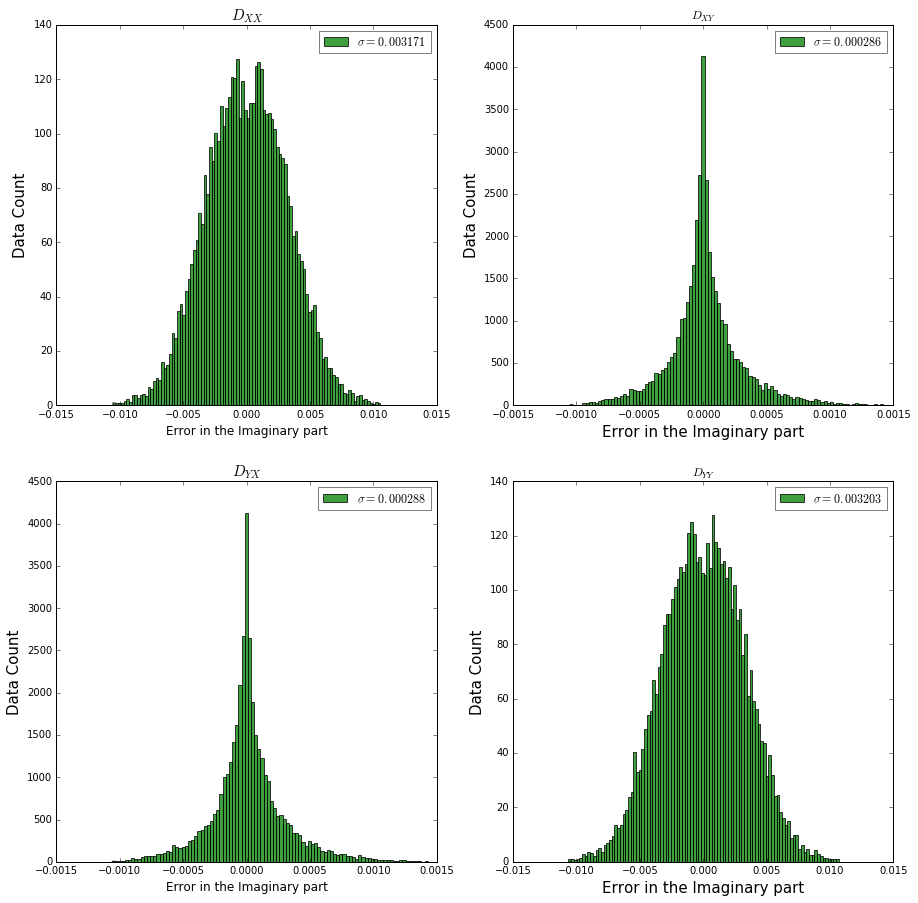

In [43]:
plothist(m[idx,0,0,:,:].imag, m[idx,0,1,:,:].imag, m[idx,1,0,:,:].imag, m[idx,1,1,:,:].imag, set_title = 'ANT1', channum=idx)

In [ ]:
# plothist(xx_im, xy_im, yx_im, yy_im, set_title = 'ANT1', channum=0)

In [57]:
import scaling as scl

In [ ]:
filenamePrefix, filePol=['XX', 'YX', 'XY', 'YY'], fileReim=['re', 'im'], _clip=0.2, fileInputPath='./', outPath='./'

In [60]:
fPfx = 'meerkat_beam__jones_S0000'
input_pt = '/net/elwood/home/narh/OSKAR-SIM/OSKAR_Simulation/gssti/2D128/meerkat_sim_results/'


scl.genBeamsParameters(filenamePrefix=fPfx, filePol=['XX', 'YX', 'XY', 'YY'], fileReim=['re', 'im'], _clip=0.2, fileInputPath=input_pt, outPath='./')

generating beams parameter for XX beams...

49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 ....Done!

generating beams parameter for YY beams...

49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0 ....Done!

Saving beams parameters to disk....

Beams' parameters saved in 'beamfits-meerkat_beam__jones_S0000-clip-0.2.cp'
Done !!!



('beamfits-meerkat_beam__jones_S0000-clip-0.2.cp',
 (<gaussfitsutil.FittedBeamParm at 0x7f48c94b7a10>,
  <gaussfitsutil.FittedBeamParm at 0x7f48c94c4a10>))

In [111]:
# tt = pkl.load(file('beamfits-meerkat_beam__jones_S0000-clip-0.2.cp'))
# tt[0][1]

### 1.6 Beamwidth vr frequency

Coefficients [ -6.26794285e-05   6.09216897e-03  -9.10514779e-02   4.89241271e-01]


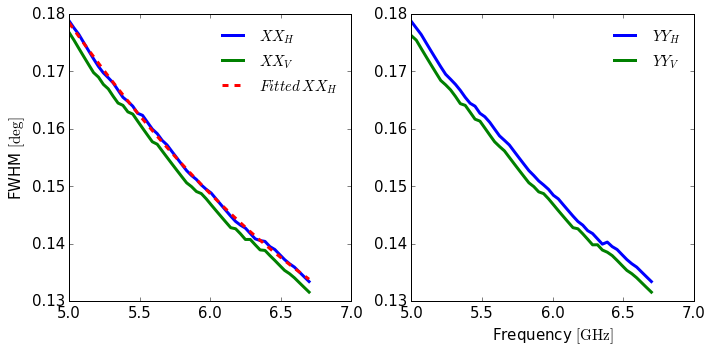

In [28]:
#
import matplotlib as mpl
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

w = np.load('beamfits-meerkat_beam__jones_S0000-clip-0.2.cp')

plt.figure(1, figsize=(10,5))
row= 1; col=2; cnt = 1
plt.subplot(row,col,cnt)

plt.plot(np.linspace(5.0, 6.7, len(w[0].xw)), w[0].xw, lw =3, label=r'$XX_{H}$')
plt.plot(np.linspace(5.0, 6.7, len(w[0].yw)), w[0].yw, lw = 3, label=r'$XX_{V}$')
rb  = w[0].xw
p = np.polyfit(np.linspace(5.0, 6.7, len(w[0].xw)),rb, 3)

print 'Coefficients', p

tl = np.polyval(p, np.linspace(5.0, 6.7, len(w[0].xw)))

plt.plot(np.linspace(5.0, 6.7, len(w[0].xw)),tl, 'r--', lw =3, label=r'$Fitted\,  XX_{H}$')
plt.legend(frameon = False, fontsize=label_size)
plt.ylabel( r'FWHM $\mathrm{[deg]}$', fontsize=label_size)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)

row= 1; col=2; cnt = 2

plt.subplot(row,col,cnt)
plt.plot(np.linspace(5.0, 6.7, len(w[1].xw)), w[1].xw, lw =3, label=r'$YY_{H}$')
plt.plot(np.linspace(5.0, 6.7, len(w[1].yw)), w[1].yw, lw = 3, label=r'$YY_{V}$')
plt.legend(frameon = False, fontsize=label_size)
plt.xlabel( r'Frequency $\mathrm{[GHz]}$', fontsize=label_size)
plt.tight_layout()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)



# import matplotlib as mpl
# label_size = 8
# mpl.rcParams['xtick.labelsize'] = label_size

[ -1.27499957e-02   3.74843686e-01  -4.39735739e+00   2.57346362e+01
  -7.51720634e+01   8.79096870e+01]


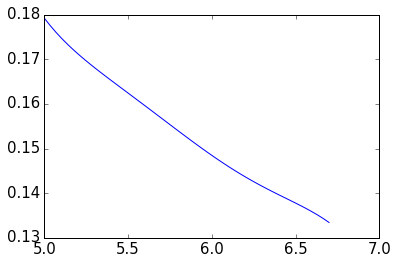

In [110]:
x = np.linspace(5.0, 6.7, len(w[1].xw))
rb  = w[1].xw
p = np.polyfit(x,rb, 5)

print p

tl = np.polyval(p, x)

plt.plot(x,tl)

In [ ]:

import pylab as plt
pt = './'
s = os.path.join(pt, 'beamfits-meerkat_beam__jones_S0000-clip-0.2.cp')
hb = np.load(s)
r = 2; c = 2
count= 1 
VAR_THRESHOLD = 0.04
plt.figure(1, figsize=(10,8))
for ant in ['00', '05']:
    print ant
    plt.subplot(r,c,count)
    
    hb[0]['%s' %ant].set_mask((hb[0]['%s' %ant].var>VAR_THRESHOLD)|(hb[1]['%s' %ant].var<=0))
    
    plt.plot(hb[0]['%s' %ant].xw, label=r'$XX_{xw}$')
    plt.plot(hb[0]['%s' %ant].yw, label=r'$XX_{yw}$')
#     plt.plot(hb[0]['%s' %ant].xw, label=r'$RR_{xw}$')
#     plt.plot(hb[0]['%s' %ant].yw, label=r'$RR_{yw}$')
#     plt.title(r'ANT %s' %ant)
    plt.legend(framealpha=0.5)
    plt.ylim(1.2,2.3)
    
    if count < 3:
        frame = plt.gca()
        frame.axes.get_xaxis().set_ticklabels([])
    
    if count ==3:
        plt.ylabel( r'FWHM $[deg]$')
    
    count += 1
    plt.subplot(r,c,count)
    hb[1]['%s' %ant].set_mask((hb[1]['%s' %ant].var>VAR_THRESHOLD)|(hb[0]['%s' %ant].var<=0))

    plt.plot(hb[1]['%s' %ant].xw, label=r'$YY_{xw}$')
    plt.plot(hb[1]['%s' %ant].yw, label=r'$YY_{yw}$')
    plt.title(r'ANT %s' %ant)
    plt.legend(framealpha=0.5)
    plt.ylim(1.2,2.3)
    
    if count < 3:
        frame = plt.gca()
        frame.axes.get_xaxis().set_ticklabels([])
        
    count += 1

plt.xlabel(r'Frequency $[GHz]$')